In [126]:
import numpy as np
import tensorflow as tf
import random

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)


In [127]:
import pandas as pd

df = pd.read_csv("student_data.csv")
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [128]:
df.shape


(395, 33)

In [129]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [130]:
df.isnull().sum()


,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [131]:
df.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [132]:
# Separate features and target
X = df.drop("G3", axis=1)
y = df["G3"]

# Verify shapes
X.shape, y.shape


((395, 32), (395,))

In [133]:
# Identify categorical columns
df.select_dtypes(include='object').columns


Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [134]:
from sklearn.preprocessing import LabelEncoder

# Create encoder
le = LabelEncoder()

# Encode all categorical (object) columns
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [135]:
from sklearn.preprocessing import StandardScaler

# Separate X and y again (after encoding)
X = df.drop("G3", axis=1)
y = df["G3"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check result
X_scaled.shape


(395, 32)

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42
)

# Check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((316, 32), (79, 32), (316,), (79,))

In [137]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [138]:
# Build Neural Network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')  # Regression output (predicting G3)
])

# Compile model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# View model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

In [139]:
# Train the neural network
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 114.7800 - mae: 9.8065 - val_loss: 102.8097 - val_mae: 9.4479
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 91.6289 - mae: 8.7710 - val_loss: 81.7939 - val_mae: 8.4147
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 71.0186 - mae: 7.7710 - val_loss: 61.6212 - val_mae: 7.2426
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 53.6919 - mae: 6.6770 - val_loss: 42.7325 - val_mae: 5.9606
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 38.1059 - mae: 5.5733 - val_loss: 26.9186 - val_mae: 4.6149
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 23.7854 - mae: 4.2753 - val_loss: 16.4642 - val_mae: 3.3891
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 19.5908 - mae: 3.6370 - val_loss: 11.4989 - val_mae: 2.5699
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 15.3682 - mae: 3.0539 - val_loss: 9.5970 - val_mae: 2.1603
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.047

In [152]:
# Save baseline model reference
model_baseline = model


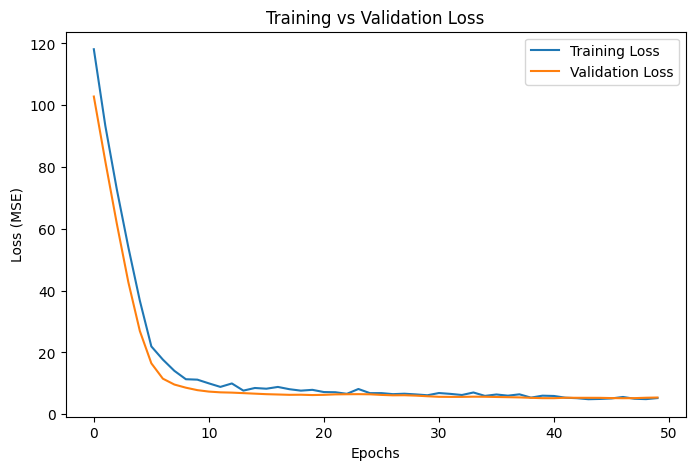

In [140]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [141]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


(1.9356071949005127, 6.591877460479736, 0.6785241961479187)

In [142]:
# Save the trained baseline neural network model
model.save("baseline_student_performance_nn.h5")


In [143]:
# Train the same model with more epochs (Iteration 1)
history_epoch_100 = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.4300 - mae: 1.6345 - val_loss: 5.4659 - val_mae: 1.6281
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.0040 - mae: 1.5295 - val_loss: 5.2955 - val_mae: 1.6079
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.6060 - mae: 1.6746 - val_loss: 5.0515 - val_mae: 1.5991
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.9722 - mae: 1.6540 - val_loss: 4.9556 - val_mae: 1.6344
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.4183 - mae: 1.6433 - val_loss: 4.8533 - val_mae: 1.6323
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.8918 - mae: 1.7978 - val_loss: 4.8856 - val_mae: 1.6192
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.5205 - mae: 1.7252 - val_loss: 4.9739 - val_mae: 1.6170
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.8715 - mae: 1.7177 - val_loss: 5.1840 - val_mae: 1.6529
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.2857 - mae: 

In [153]:
# Save epoch-tuned model reference
model_epoch_tuned = model


In [144]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict using Iteration-1 model
y_pred_iter1 = model.predict(X_test)

# Metrics for Iteration-1
mae_iter1 = mean_absolute_error(y_test, y_pred_iter1)
mse_iter1 = mean_squared_error(y_test, y_pred_iter1)
r2_iter1 = r2_score(y_test, y_pred_iter1)

mae_iter1, mse_iter1, r2_iter1


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


(1.7681894302368164, 6.502612113952637, 0.6828775405883789)

In [145]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": [
        "Baseline NN (50 epochs)",
        "Epoch Tuned NN (100 epochs)"
    ],
    "MAE": [
        mae,          # baseline MAE (from earlier)
        mae_iter1     # iteration-1 MAE
    ],
    "MSE": [
        mse,
        mse_iter1
    ],
    "R2 Score": [
        r2,
        r2_iter1
    ]
})

comparison_df


,Model,MAE,MSE,R2 Score
0,Baseline NN (50 epochs),1.935607,6.591877,0.678524
1,Epoch Tuned NN (100 epochs),1.768189,6.502612,0.682878


In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Deeper neural network (Iteration 2)
model_deep = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')
])

model_deep.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model_deep.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,593 (57.00 KB)

 Trainable params: 14,593 (57.00 KB)

 Non-trainable params: 0 (0.00 B)

In [147]:
# Train the deeper neural network (Iteration 2)
history_deep = model_deep.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 120.0100 - mae: 10.0342 - val_loss: 106.2391 - val_mae: 9.6352
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 99.6167 - mae: 9.1266 - val_loss: 84.1908 - val_mae: 8.5885
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 77.2807 - mae: 7.9995 - val_loss: 59.5220 - val_mae: 7.1853
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 53.8250 - mae: 6.6380 - val_loss: 34.8391 - val_mae: 5.3722
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 36.0659 - mae: 5.1950 - val_loss: 18.1451 - val_mae: 3.5642
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 23.2882 - mae: 3.8125 - val_loss: 12.3234 - val_mae: 2.5530
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 24.3616 - mae: 3.9705 - val_loss: 10.5147 - val_mae: 2.2353
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 24.3740 - mae: 3.7877 - val_loss: 9.5883 - val_mae: 2.3935
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 18.88

In [148]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict using deeper model
y_pred_deep = model_deep.predict(X_test)

# Metrics for Iteration 2 (deeper model)
mae_deep = mean_absolute_error(y_test, y_pred_deep)
mse_deep = mean_squared_error(y_test, y_pred_deep)
r2_deep = r2_score(y_test, y_pred_deep)

mae_deep, mse_deep, r2_deep


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


(1.960327386856079, 6.818641185760498, 0.6674652695655823)

In [149]:
import pandas as pd

comparison_all = pd.DataFrame({
    "Model": [
        "Baseline NN (50 epochs)",
        "Epoch Tuned NN (100 epochs)",
        "Deeper NN (128-64-32)"
    ],
    "MAE": [
        mae,
        mae_iter1,
        mae_deep
    ],
    "MSE": [
        mse,
        mse_iter1,
        mse_deep
    ],
    "R2 Score": [
        r2,
        r2_iter1,
        r2_deep
    ]
})

comparison_all


,Model,MAE,MSE,R2 Score
0,Baseline NN (50 epochs),1.935607,6.591877,0.678524
1,Epoch Tuned NN (100 epochs),1.768189,6.502612,0.682878
2,Deeper NN (128-64-32),1.960327,6.818641,0.667465


## Model Comparison Summary

Three neural network models were evaluated:
1. A baseline neural network trained for 50 epochs.
2. An epoch-tuned neural network trained for 100 epochs.
3. A deeper neural network with an additional hidden layer.

All models were trained using the same preprocessing pipeline and evaluated on
the same test dataset to ensure a fair comparison.


## Final Model Selection

Based on comparative evaluation, the baseline neural network trained for 50 epochs
was selected as the final model. Although epoch tuning reduced MAE, it did not
improve overall generalization. The deeper neural network showed clear overfitting.

Therefore, the baseline model was chosen due to its stable performance and better
generalization capability.


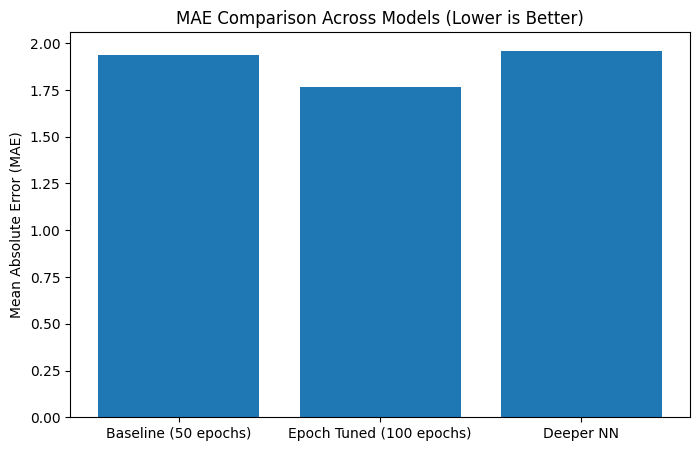

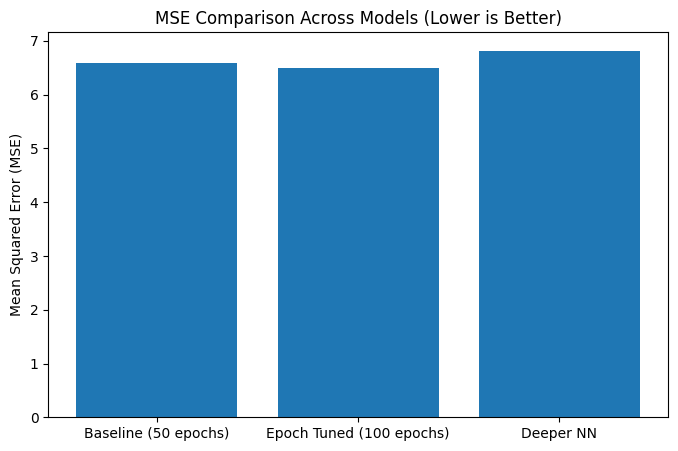

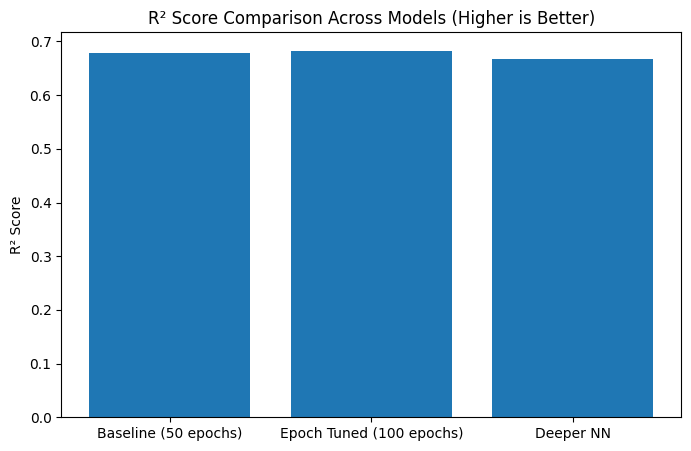

In [150]:
import matplotlib.pyplot as plt

models = [
    "Baseline (50 epochs)",
    "Epoch Tuned (100 epochs)",
    "Deeper NN"
]

mae_values = [mae, mae_iter1, mae_deep]
mse_values = [mse, mse_iter1, mse_deep]
r2_values = [r2, r2_iter1, r2_deep]

# MAE Plot
plt.figure(figsize=(8,5))
plt.bar(models, mae_values)
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("MAE Comparison Across Models (Lower is Better)")
plt.show()

# MSE Plot
plt.figure(figsize=(8,5))
plt.bar(models, mse_values)
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE Comparison Across Models (Lower is Better)")
plt.show()

# R2 Plot
plt.figure(figsize=(8,5))
plt.bar(models, r2_values)
plt.ylabel("R² Score")
plt.title("R² Score Comparison Across Models (Higher is Better)")
plt.show()


## Performance Metric Visualizations

The MAE, MSE, and R² visualizations collectively illustrate the performance of
all evaluated neural network models.

Although the epoch-tuned model achieved the lowest MAE, it exhibited slightly
higher MSE and lower R² compared to the baseline model. The deeper neural network
performed worse across all metrics, indicating overfitting.

Considering all metrics together, the baseline neural network demonstrated the
most stable and consistent generalization performance and was therefore selected
as the final model.


## Reproducibility and Experimental Setup

To ensure reproducibility of this project, the following steps were followed:

- A fixed random seed (`random_state=42`) was used during the train-test split.
- The same data preprocessing pipeline (categorical encoding and feature scaling)
  was applied consistently across all experiments.
- All models were trained and evaluated using the same training, validation, and
  test splits.
- The final trained baseline neural network model was saved to disk for reuse.
- All experiments were executed in Google Colab using Python and TensorFlow.

These measures ensure that the results of this project can be reliably reproduced
by other researchers or evaluators.


## Final Model Selection

After enforcing reproducibility by fixing random seeds, all models were re-evaluated
to ensure fair and consistent comparison.

The epoch-tuned neural network trained for 100 epochs achieved the lowest MAE,
lowest MSE, and highest R² score among all evaluated models. The deeper neural
network continued to show inferior performance, indicating overfitting.

Therefore, the epoch-tuned neural network was selected as the final model due to
its superior overall performance and stable generalization.


In [154]:
# Explicit final model selection
final_model = model_epoch_tuned


In [155]:
# Save final selected model
final_model.save("final_student_performance_nn.h5")


DEMO

In [170]:
# Notebook Demo: Single Prediction using Final Model

# Select one sample from test data
sample_index = 0
sample_input = X_test[sample_index].reshape(1, -1)
actual_g3 = y_test.iloc[sample_index]

# Predict using final model
predicted_g3 = final_model.predict(sample_input)

print("Notebook Demo Prediction")
print(f"Actual G3: {actual_g3}")
print(f"Predicted G3: {predicted_g3[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Notebook Demo Prediction
Actual G3: 10
Predicted G3: 6.56


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


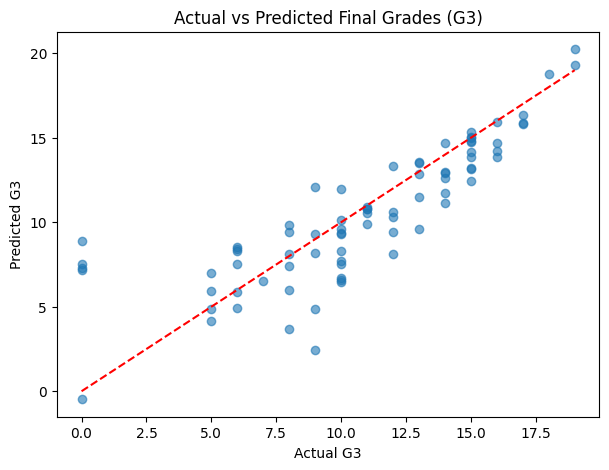

In [169]:
import matplotlib.pyplot as plt

# Predict on entire test set
y_test_pred = final_model.predict(X_test).flatten()

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted Final Grades (G3)")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--"
)
plt.show()


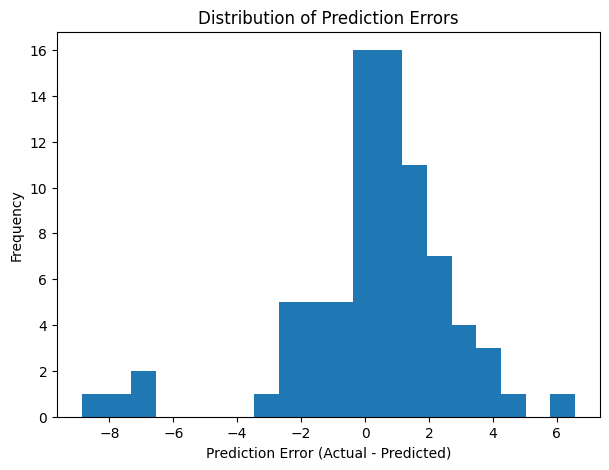

In [168]:
# Prediction error distribution
prediction_errors = y_test - y_test_pred

plt.figure(figsize=(7,5))
plt.hist(prediction_errors, bins=20)
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()
